<a href="https://colab.research.google.com/github/gobi2001-2006/computer-vision/blob/main/HOUGH_TRANSFORM_AND_HARRIS_CORNER_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

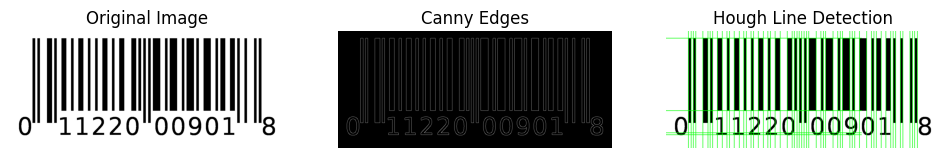

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('BAR.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw detected lines
img_lines = img.copy()  # Copy image for drawing
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lines_rgb = cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)

# Display results using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_lines_rgb)
plt.title("Hough Line Detection")
plt.axis("off")

plt.show()


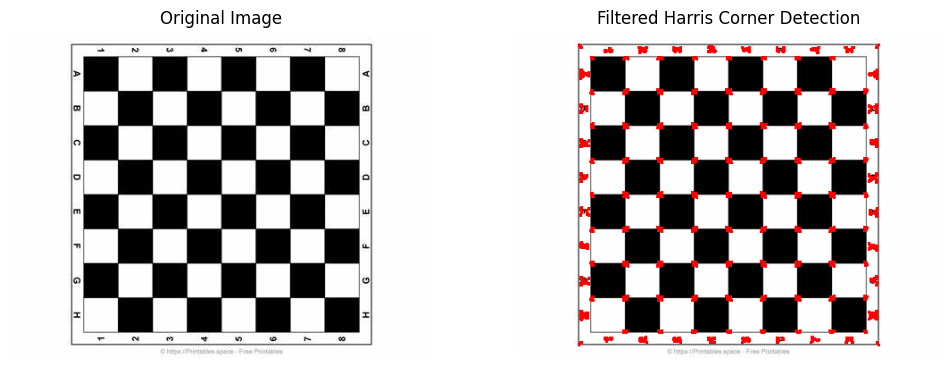

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('CHESS.jpg')  # Use your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Harris Corner Detector
gray_float = np.float32(gray_blurred)
corner_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
corner_response = cv2.dilate(corner_response, None)  # Enhance visibility

# Define a higher threshold to filter weak corners
threshold = 0.02 * corner_response.max()  # Increase threshold
corner_mask = np.zeros_like(gray)
corner_mask[corner_response > threshold] = 255  # Strong corners only

# Draw detected corners on the original image
corner_display = image.copy()
corner_display[corner_mask == 255] = [0, 0, 255]  # Red dots for corners

# Display using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(corner_display, cv2.COLOR_BGR2RGB))
axes[1].set_title("Filtered Harris Corner Detection")
axes[1].axis("off")

plt.show()


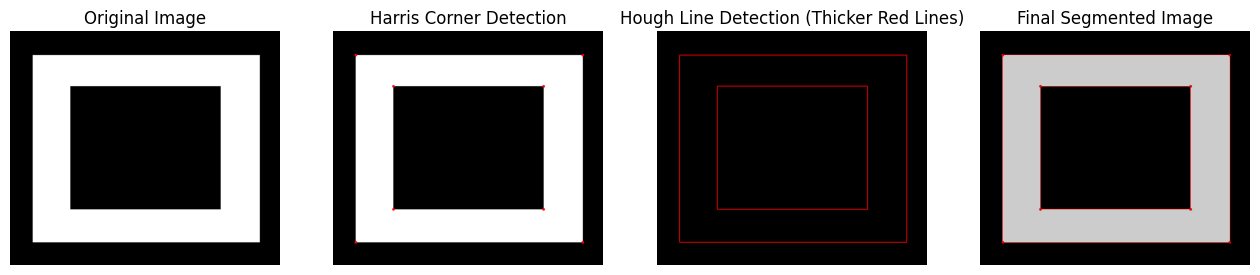

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("new.webp")  # Update with your file path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------------- HARRIS CORNER DETECTION ---------------- #
corner_response = cv2.cornerHarris(np.float32(gray), blockSize=2, ksize=3, k=0.04)
corner_response = cv2.dilate(corner_response, None)  # Enhance corner visibility

# Set threshold to extract strong corners
threshold = 0.01 * corner_response.max()
corner_image = image.copy()
y_coords, x_coords = np.where(corner_response > threshold)

# Draw detected corners on the image
for x, y in zip(x_coords, y_coords):
    cv2.circle(corner_image, (x, y), 6, (0, 0, 255), -1)  # Increased circle size

# ---------------- HOUGH LINE DETECTION ---------------- #
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=20, maxLineGap=5)

hough_image = np.zeros_like(image)

# Draw detected lines with thicker size
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_image, (x1, y1), (x2, y2), (0, 0, 255), 4)  # Increased line thickness

# ---------------- FINAL SEGMENTATION ---------------- #
segmented_image = cv2.addWeighted(corner_image, 0.8, hough_image, 1, 0)

# ---------------- DISPLAY RESULTS ---------------- #
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Harris Corner Detection")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(hough_image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Hough Line Detection (Thicker Red Lines)")
axes[2].axis("off")

axes[3].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axes[3].set_title("Final Segmented Image")
axes[3].axis("off")

plt.show()
